In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import networkx as nx
from scipy.stats import pearsonr

# machine lerning
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../Data/preprocessed_data/final_data/full_db.csv')
df.columns

Index(['name', 'gender', 'career_length', 'number_of_movies', 'avg_revenue_0',
       'avg_budget_0', 'std_budget_0', 'avg_imdb_rating_0', 'avg_order_0',
       'std_order_0', 'avg_popularity_0', 'n_genres_0', 'main_genre_0',
       'interval', 'start_date_1', 'end_date_1', 'start_date_2', 'end_date_2',
       'count_interval_1', 'count_interval_2', 'avg_budget_1', 'std_budget_1',
       'avg_revenue_1', 'avg_imdb_rating_1', 'avg_order_1', 'std_order_1',
       'avg_popularity_1', 'n_genres_1', 'main_genre_1', 'start_date_3',
       'end_date_3', 'count_interval_3', 'avg_budget_2', 'std_budget_2',
       'avg_revenue_2', 'avg_imdb_rating_2', 'avg_order_2', 'std_order_2',
       'avg_popularity_2', 'n_genres_2', 'main_genre_2', 'success',
       'avg_scaled_portion_0', 'avg_scaled_portion_1', 'avg_scaled_portion_2',
       'std_scaled_portion_0', 'std_scaled_portion_1', 'std_scaled_portion_2'],
      dtype='object')

# Role Importance Analysis

In [4]:
#Load data
df = pd.read_csv('../Data/preprocessed_data/final_data/full_db.csv')

columns_to_keep = ['name', 'avg_scaled_portion_0', 'avg_scaled_portion_1', 'avg_scaled_portion_2',
       'std_scaled_portion_0', 'std_scaled_portion_1', 'std_scaled_portion_2','success']
df = df[columns_to_keep]
full_df = df.rename(columns={'name': 'Name', 'avg_scaled_portion_0': 'avg_role_0', 'std_scaled_portion_0': 'std_role_0', 
                             'avg_scaled_portion_1': 'avg_role_1', 'std_scaled_portion_1': 'std_role_1', 
                             'avg_scaled_portion_2': 'avg_role_2', 'std_scaled_portion_2': 'std_role_2'})
full_df.sort_values(by=['success'], ascending=False)

,Name,avg_role_0,avg_role_1,avg_role_2,std_role_0,std_role_1,std_role_2,success
5185,Nicolas Cage,19.167681,23.578252,6.777468,17.469373,22.498200,14.492376,2.252450
2135,Leonardo DiCaprio,8.188123,5.880148,NaN,14.534573,14.414917,NaN,2.165815
5186,Tom Hanks,22.718111,10.406015,4.535494,16.802558,16.864797,10.040858,2.093282
6126,Gary Oldman,11.154801,5.294004,3.717017,15.746188,8.000178,6.807601,2.063533
2168,Scarlett Johansson,17.231092,2.783295,NaN,17.293332,4.448593,NaN,2.043450
...,...,...,...,...,...,...,...,...
2129,Ahney Her,2.780013,NaN,NaN,NaN,NaN,NaN,0.311359
2131,Tara Macken,0.799678,NaN,NaN,NaN,NaN,NaN,0.293505
2132,Harry Holland,0.399452,NaN,NaN,NaN,NaN,NaN,0.244641
2133,Dale Pavinski,1.194572,NaN,NaN,NaN,NaN,NaN,0.193497


In [16]:
beginning = full_df[['success', 'avg_role_0', 'std_role_0']].dropna() # Actors who had a beginning career (No NaN in avg_role_0)
middle = full_df[~full_df['avg_role_1'].isna()][['success','avg_role_0', 'std_role_0', 'avg_role_1', 'std_role_1']].dropna() # Actors who had a mid career (No NaN in avg_role_1)
end = full_df[~full_df['avg_role_2'].isna()][['success','avg_role_0', 'std_role_0', 'avg_role_1', 'std_role_1', 'avg_role_2', 'std_role_2']].dropna() # Actors who had a end career (No NaN in avg_role_2)


avg_role_beginning = beginning['avg_role_0']
avg_role_mid = middle['avg_role_1']
avg_role_end = end['avg_role_2']


std_role_beginning = beginning['std_role_0']
std_role_mid = middle['std_role_1']
std_role_end = end['std_role_2']

success_beginning = beginning['success'] 
success_mid = middle['success'] 
success_end = end['success']

assert len(avg_role_beginning) == len(std_role_beginning) == len(success_beginning)
assert len(avg_role_mid) == len(std_role_mid) == len(success_mid)
assert len(avg_role_end) == len(std_role_end) == len(success_end)


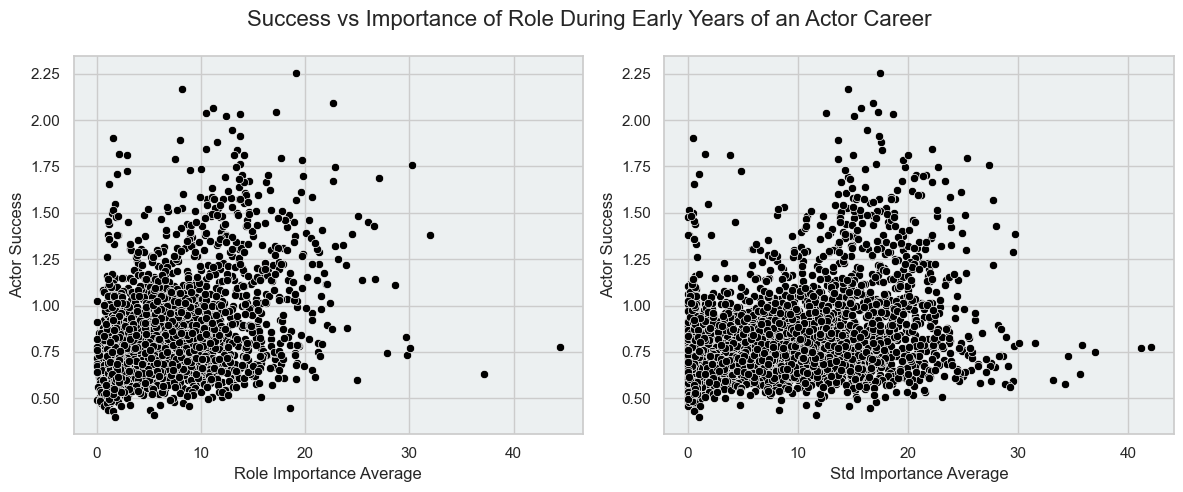

In [17]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role During Early Years of an Actor Career ', fontsize=16)
# Flatten the 3 by 2 array of subplots into a 1D array for easier indexing
axes = axes.flatten()
sns.set_theme()
light_blue = '#ECF0F1'
light_green = '#D5F5E3'
light_yellow = '#FFFFE0'
# Set Seaborn style
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_beginning, y=success_beginning, ax=axes[0],  color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_blue)


# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_beginning, y=success_beginning, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_blue)


plt.tight_layout()
plt.show()

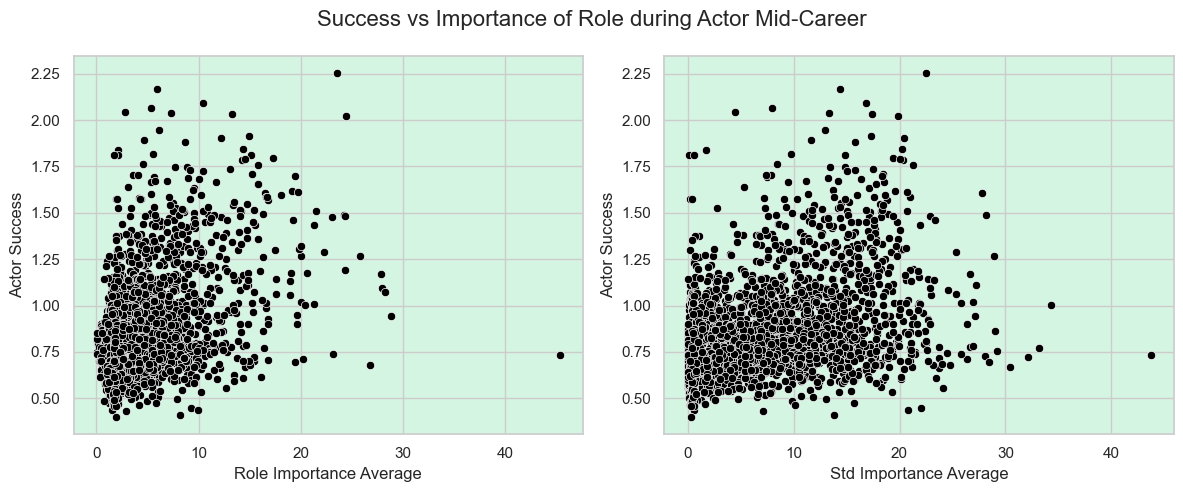

In [18]:
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Mid-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs Role Average
sns.scatterplot(x=avg_role_mid, y=success_mid, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_green)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_mid, y=success_mid, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_green)

plt.tight_layout()
plt.show()


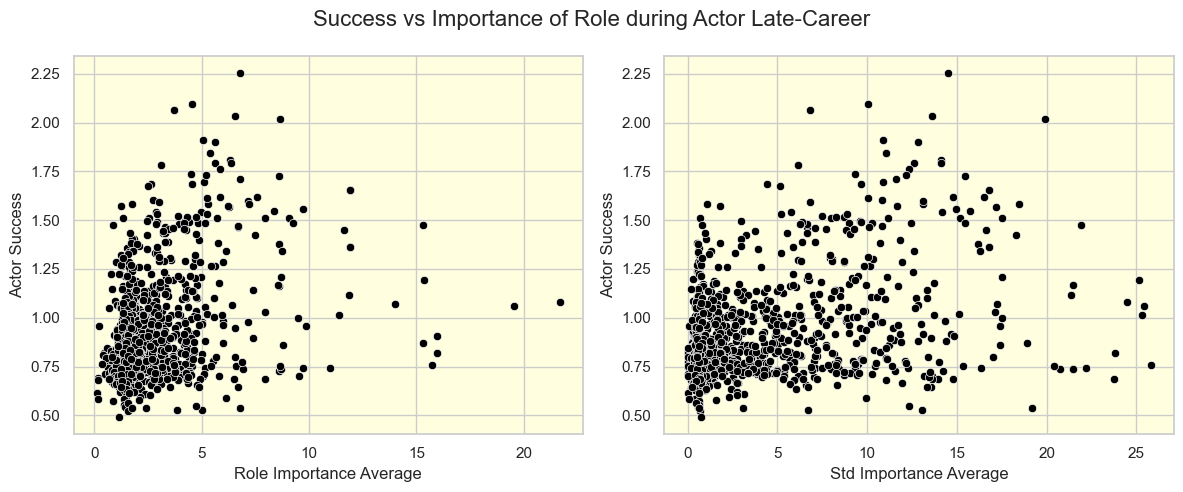

In [19]:

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Success vs Importance of Role during Actor Late-Career', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

sns.scatterplot(x=avg_role_end, y=success_end, ax=axes[0], color='black')
axes[0].set_xlabel('Role Importance Average')
axes[0].set_ylabel('Actor Success')
axes[0].set_facecolor(light_yellow)

# Plot 2: Success vs Role Standard Deviation
sns.scatterplot(x=std_role_end, y=success_end, ax=axes[1], color='black')
axes[1].set_xlabel('Std Importance Average')
axes[1].set_ylabel('Actor Success')
axes[1].set_facecolor(light_yellow)

plt.tight_layout()
plt.show()

## Hypothesis testing: Pearson Correlation

p-value average: [4.35913972e-218 8.04035326e-276 3.93149541e-059]
p-value standard deviation: [5.64493229e-153 3.39109497e-254 3.71071039e-072]


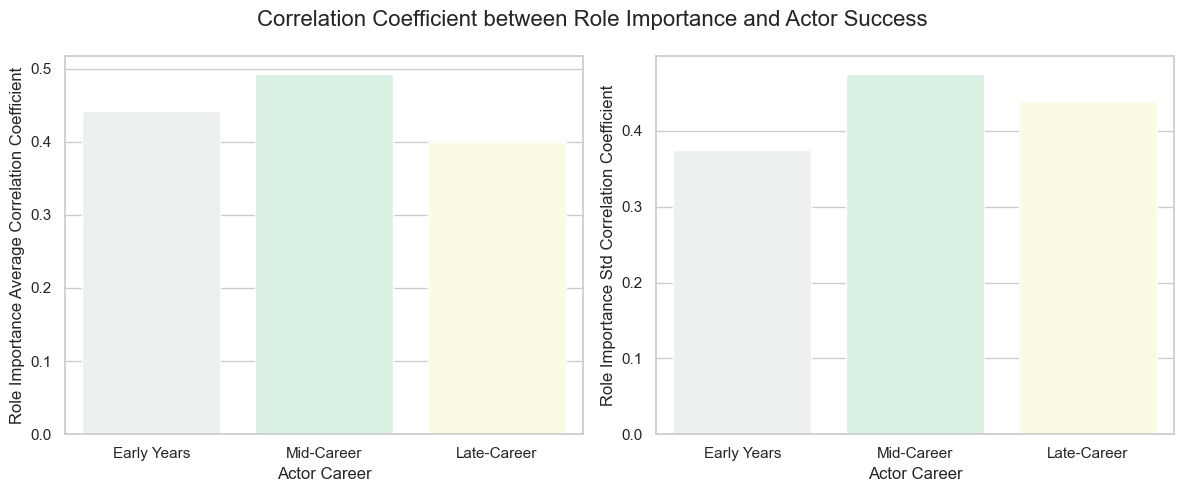

In [21]:
# Role importance Averages
cc_av=np.zeros(3)
p_av=np.zeros(3)
cc_av[0], p_av[0] = pearsonr(avg_role_beginning, success_beginning) # Early Years
cc_av[1], p_av[1] = pearsonr(avg_role_mid, success_mid) # Mid-Career
cc_av[2], p_av[2] = pearsonr(avg_role_end, success_end) # Late-Career 

# Role Importance Standard deviation
cc_std=np.zeros(3)# Correlation Coefficient
p_std=np.zeros(3) # Pvalue
cc_std[0], p_std[0] = pearsonr(std_role_beginning, success_beginning) # Early Years
cc_std[1], p_std[1] = pearsonr(std_role_mid, success_mid) # Mid-Career
cc_std[2], p_std[2] = pearsonr(std_role_end, success_end) # Late-Career 

print("p-value average:", p_av)
print("p-value standard deviation:", p_std)

# Plotting the correlation coefficient
fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig1.suptitle('Correlation Coefficient between Role Importance and Actor Success', fontsize=16)
axes = axes.flatten()
sns.set_theme()
sns.set(style="whitegrid")

# Plot 1: Success vs budget Average

palette = sns.color_palette("light:#5A9")
palette = [light_blue, light_green, light_yellow]

sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_av, ax=axes[0], palette=palette)

axes[0].set_xlabel('Actor Career')
axes[0].set_ylabel('Role Importance Average Correlation Coefficient')

# Plot 2: Success vs budget Standard Deviation
sns.barplot(x=['Early Years', 'Mid-Career', 'Late-Career'], y=cc_std, ax=axes[1], palette=palette)
axes[1].set_xlabel('Actor Career')
axes[1].set_ylabel('Role Importance Std Correlation Coefficient')

plt.tight_layout()
plt.show()


## Regression Analysis: Gradient Boosting Regression

In [22]:
def numpy_helper(df, cols):
    new_array = df[cols].values.astype(float)
    return new_array

In [40]:
# instead of accuracy, precision and recall (more used for classification), use Neg-MSE (Mean Square Error) and R-squared
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

def predict(career, df, test_feature, target='success'):

    features = df.columns.tolist()
    features.remove(target)
    features.remove(test_feature)

    # Model 1 without test_feature
    X = numpy_helper(df, features)
    y = numpy_helper(df, target)
    model1 = Ridge()
    results_model1 = cross_validate(model1, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'))

    print("The prediction results without the ", test_feature, " for the ", career, " are: ")
    
    print("R2",results_model1['test_r2'].mean())
    print("Negative Mean Square", results_model1['test_neg_mean_squared_error'].mean())
    print()
    # Model 2 with test_feature
    X = numpy_helper(df, features + [test_feature])
    y = numpy_helper(df, target)
    model2 = Ridge()
    results_model2 = cross_validate(model2, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'))

    print("The prediction results with the ", test_feature, " for the ", career, " are: ")
    print("R2",results_model2['test_r2'].mean())
    print("Negative Mean Square", results_model2['test_neg_mean_squared_error'].mean())
    print('------------------------------------------------------')

#Early years- average role
predict('Early Years', beginning, 'avg_role_0')

#Early years- std role
predict('Early Years', beginning, 'std_role_0')

#Mid-Career- avg role
predict('Mid-Career', middle, 'avg_role_1')

#Mid-Career- std role
predict('Mid-Career', middle, 'std_role_1')

#Late-Career- avg role
predict('Late-Career', end, 'avg_role_2')

#Late-Career- std role
predict('Late-Career', end, 'std_role_2')


The prediction results without the  avg_role_0  for the  Early Years  are: 
R2 -0.44509941486210564
Negative Mean Square -0.04736007537234813

The prediction results with the  avg_role_0  for the  Early Years  are: 
R2 -0.36287626842629644
Negative Mean Square -0.04439396287159484
------------------------------------------------------
The prediction results without the  std_role_0  for the  Early Years  are: 
R2 -0.3672890153351674
Negative Mean Square -0.044531997572098865

The prediction results with the  std_role_0  for the  Early Years  are: 
R2 -0.36287626842629644
Negative Mean Square -0.04439396287159484
------------------------------------------------------
The prediction results without the  avg_role_1  for the  Mid-Career  are: 
R2 -1.107939826689388
Negative Mean Square -0.040165343301519114

The prediction results with the  avg_role_1  for the  Mid-Career  are: 
R2 -1.198662463480318
Negative Mean Square -0.04334188415521565
-------------------------------------------------